# 04 Feature Engineering

In this notebook, we engineer text-based features for message classification.

In [1]:
# Import packages and utilities
import sys
sys.path.append('../scripts')
import utils
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
utils.set_plot_style()

### Load Cleaned Data

In [2]:
df = utils.load_tweets_csv('../data/twcs/twcs.csv')
# Drop missing text rows
df = df.dropna(subset=['text'])
# Add message_type if not present
if 'message_type' not in df.columns:
    def classify_message(row):
        if row['inbound'] and pd.isna(row['in_response_to_tweet_id']):
            return 'customer_complaint_or_inquiry'
        elif not row['inbound'] and not pd.isna(row['response_tweet_id']):
            return 'company_response'
        else:
            return 'other'
    df['message_type'] = df.apply(classify_message, axis=1)
# Drop 'other' rows
df = df[df['message_type'] != 'other']
print("Preview of the cleaned DataFrame:")
df.head()

Preview of the cleaned DataFrame:


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,message_type
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0,company_response
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0,company_response
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0,company_response
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,customer_complaint_or_inquiry
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0,company_response


### We will add features: text length, word count, and character count.

In [3]:
# Clean text column (if not already cleaned)
if 'clean_text' not in df.columns:
    df['clean_text'] = df['text'].apply(utils.clean_text)

# Add text features
df = utils.get_text_features(df, 'clean_text')

# Show summary statistics for new features
df[['clean_text_length', 'clean_text_word_count', 'clean_text_char_count']].describe()

,clean_text_length,clean_text_word_count,clean_text_char_count
count,1.254662e+06,1.254662e+06,1.254662e+06
mean,9.648639e+01,1.854303e+01,7.893990e+01
std,4.676496e+01,9.019244e+00,3.808505e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.500000e+01,1.300000e+01,5.300000e+01
50%,9.500000e+01,1.800000e+01,7.700000e+01
75%,1.180000e+02,2.300000e+01,9.700000e+01
max,2.820000e+02,7.000000e+01,2.720000e+02


### Visualize Feature Distributions

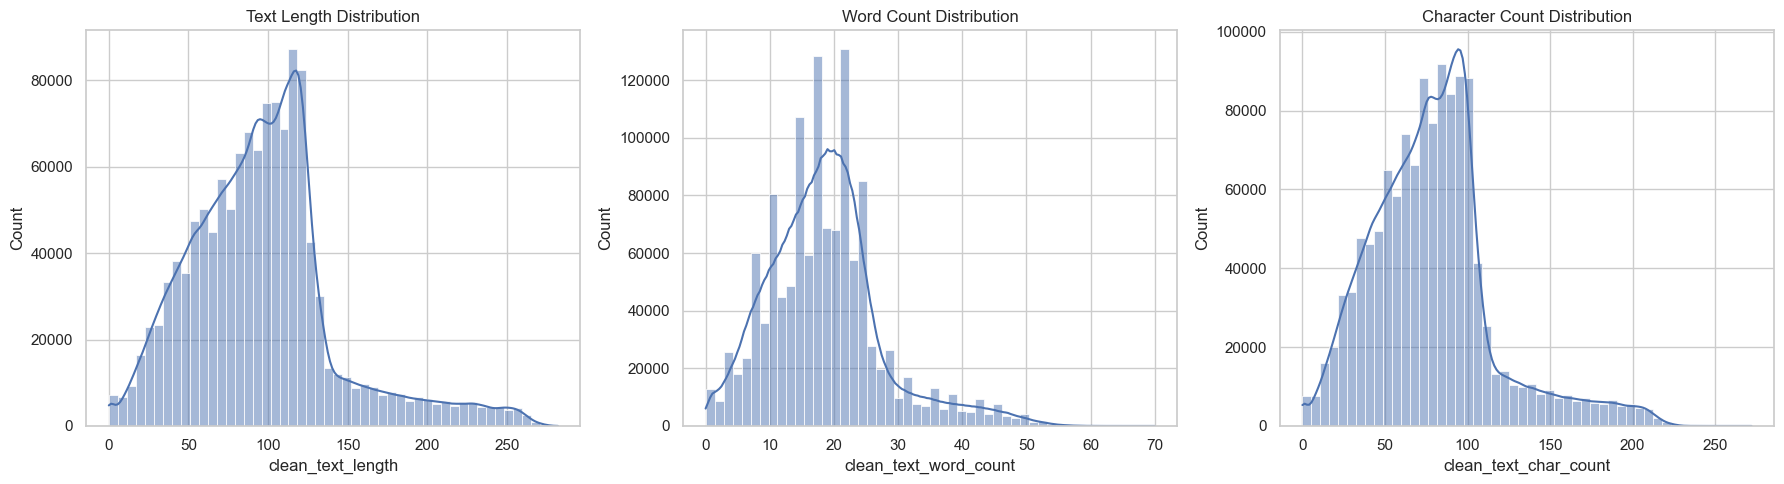

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['clean_text_length'], bins=50, ax=axes[0], kde=True)
axes[0].set_title('Text Length Distribution')
sns.histplot(df['clean_text_word_count'], bins=50, ax=axes[1], kde=True)
axes[1].set_title('Word Count Distribution')
sns.histplot(df['clean_text_char_count'], bins=50, ax=axes[2], kde=True)
axes[2].set_title('Character Count Distribution')
plt.tight_layout()
plt.show()

### Feature Correlation

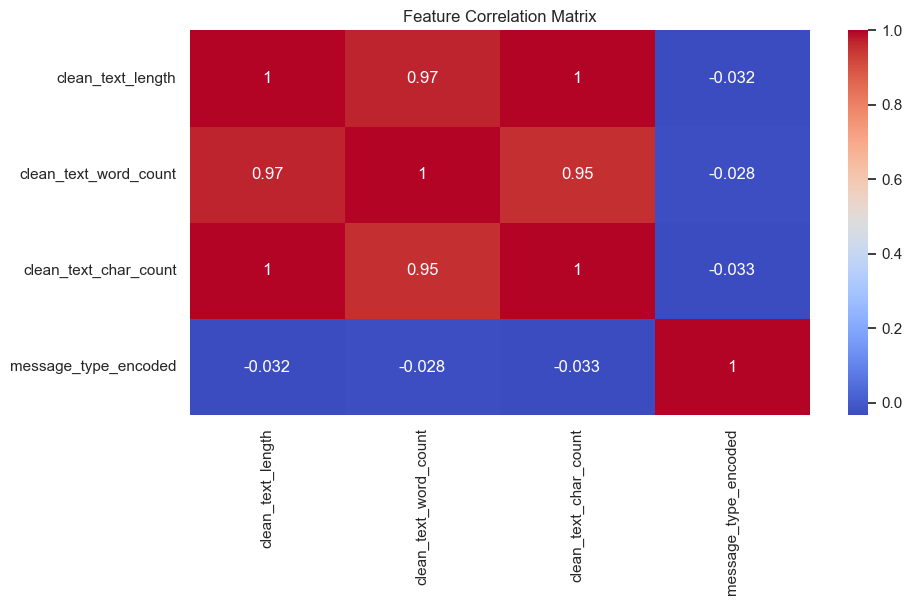

In [5]:
# Encode message_type for correlation (using utils.encode_labels)
df['message_type_encoded'], encoder = utils.encode_labels(df['message_type'])

# Compute correlation matrix (using pandas)
corr = df[['clean_text_length', 'clean_text_word_count', 'clean_text_char_count', 'message_type_encoded']].corr()

# Plot heatmap (using seaborn)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

### Save Engineered Data

In [6]:
df.to_csv('../data/twcs/twcs_features.csv', index=False)
print("Feature-engineered data saved to ../data/twcs/twcs_features.csv")

Feature-engineered data saved to ../data/twcs/twcs_features.csv
